In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("C:/Users/USER/py/projects/Copper_Modeling/data/Copper_Set.csv", low_memory=False)

In [3]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.1279489,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.4110654,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.5262616,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
data.shape

(181673, 14)

null values

In [5]:
null_values = data.isnull().sum()
print(null_values)

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


changing the datatype

In [7]:
import datetime as dt
import numpy as np

In [8]:

data['item_date'] = pd.to_datetime(data['item_date'],format='%Y%m%d',errors='coerce').dt.date
data['delivery date'] = pd.to_datetime(data['delivery date'],format='%Y%m%d',errors='coerce').dt.date
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors='coerce',downcast='float')
data['customer'] = pd.to_numeric(data['customer'], errors='coerce')
data['country'] = pd.to_numeric(data['country'], errors='coerce')
data['application'] = pd.to_numeric(data['application'], errors='coerce')
data['thickness'] = pd.to_numeric(data['thickness'], errors='coerce',downcast='float')
data['width'] = pd.to_numeric(data['width'], errors='coerce',downcast='float')
data['material_ref'] = data['material_ref'].str.lstrip('0')
data['product_ref'] = pd.to_numeric(data['product_ref'], errors='coerce')
data['selling_price'] = pd.to_numeric(data['selling_price'], errors='coerce',downcast='float')

In [9]:
data.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286865,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.573775,261.638916,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [10]:
#removing negative values
import numpy as np
data['quantity tons'] = data['quantity tons'].apply(lambda x: x if x > 0 else np.nan)
data['selling_price'] = data['selling_price'].apply(lambda x: x if x > 0 else np.nan)

In [11]:
print(data['quantity tons'].isna().sum())
print(data['selling_price'].isna().sum())

5
8


In [12]:
data = data.dropna(subset=['quantity tons','selling_price'])

In [13]:
print(data['quantity tons'].isna().sum())
print(data['selling_price'].isna().sum())

0
0


In [14]:
data.isnull().sum()

id                   2
item_date            3
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77912
product_ref          0
delivery date        3
selling_price        0
dtype: int64

In [15]:
#handling null values
data['material_ref'] = data['material_ref'].fillna("unknown")

In [16]:
data.isnull().sum()

id                2
item_date         3
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     0
dtype: int64

In [17]:
data = data.dropna()

In [18]:
data.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [19]:
#checking for duplicated rows
(data.duplicated()).sum()

0

In [20]:
data['status'].value_counts().index

Index(['Won', 'Lost', 'Not lost for AM', 'Revised', 'To be approved', 'Draft',
       'Offered', 'Offerable', 'Wonderful'],
      dtype='object', name='status')

In [21]:
data['item type'].value_counts().index

Index(['W', 'S', 'PL', 'Others', 'WI', 'IPL', 'SLAWR'], dtype='object', name='item type')

In [22]:
data['application'].unique()

array([10., 41., 28., 59., 15.,  4., 38., 56., 42., 26., 27., 19., 20.,
       66., 29., 22., 40., 25., 67., 79.,  3., 99.,  2.,  5., 39., 69.,
       70., 65., 58., 68.])

In [23]:
data['country'].unique()

array([ 28.,  25.,  30.,  32.,  38.,  78.,  27.,  77., 113.,  79.,  26.,
        39.,  40.,  84.,  80., 107.,  89.])

In [24]:
data['quantity tons'].min()

1e-05

In [25]:
data['quantity tons'].max()

1000000000.0

In [26]:
print(data['thickness'].min())
print(data['thickness'].max())

0.18000000715255737
400.0


In [27]:
print(data['width'].min())
print(data['width'].max())

1.0
2990.0


In [28]:
data['product_ref'].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642], dtype=int64)

In [29]:
print(data['selling_price'].min())
print(data['selling_price'].max())

0.1
100001015.0


EDA

In [30]:
# plotting continous variable
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = data.copy()

In [31]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [32]:
df.drop(columns=['id'],inplace=True)

In [33]:
print('quantity tons:',df['quantity tons'].skew())
print('country:',df['country'].skew())
print('customer:',df['customer'].skew())
print('application:',df['application'].skew())
print('thickness:',df['thickness'].skew())
print('width:',df['width'].skew())
print('selling_price:',df['selling_price'].skew())

quantity tons: 424.62886378007687
country: 0.7535164382634496
customer: -149.0871412256045
application: 0.7243837140276725
thickness: 15.302911
width: 0.37481126
selling_price: 301.34412211966924


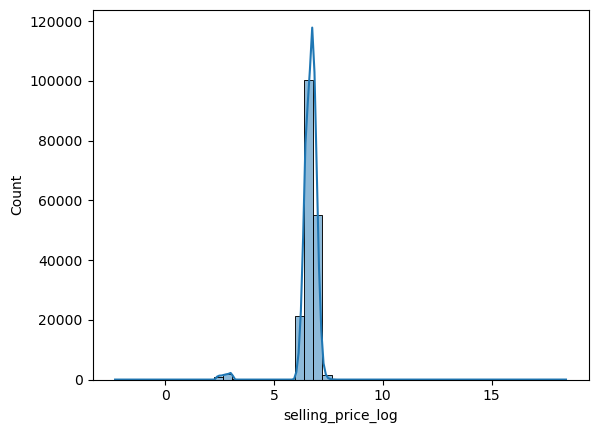

In [34]:
df['selling_price_log'] = np.log(df['selling_price'])
sns.histplot(df['selling_price_log'],kde=True,bins=50)
plt.show()

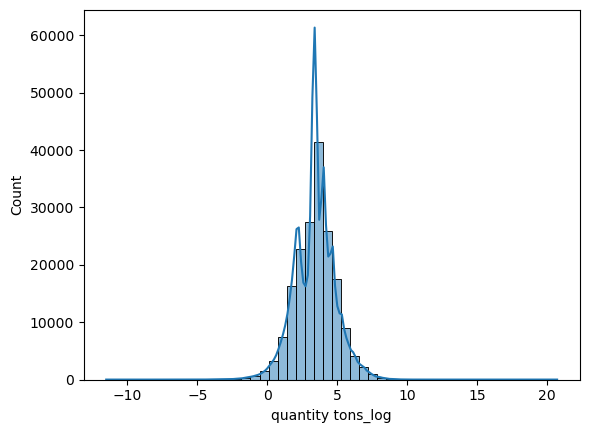

In [35]:
df['quantity tons_log'] = np.log(df['quantity tons'])
sns.histplot(df['quantity tons_log'],kde=True,bins=50)
plt.show()


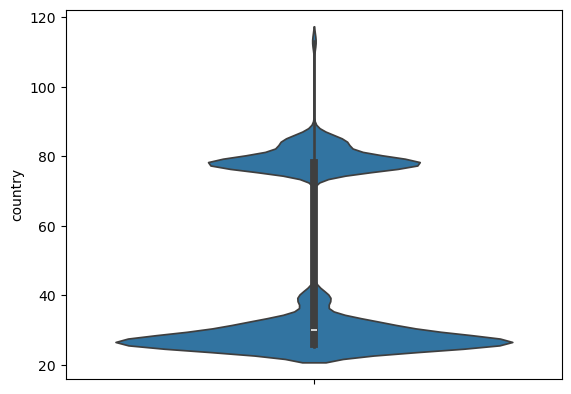

In [36]:
sns.violinplot(df['country'])
plt.show()

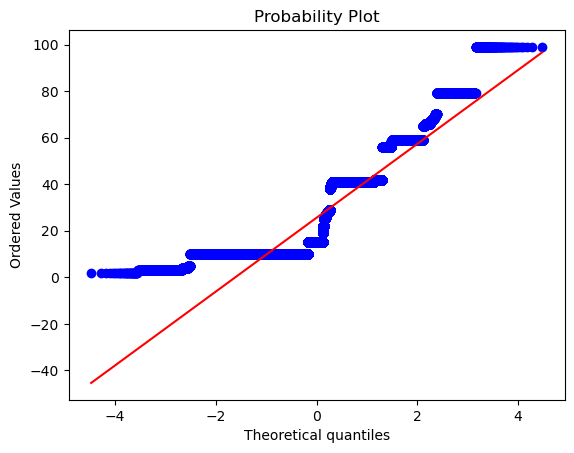

In [37]:
import scipy.stats as stats
stats.probplot(data['application'], dist="norm", plot=plt)
plt.show()

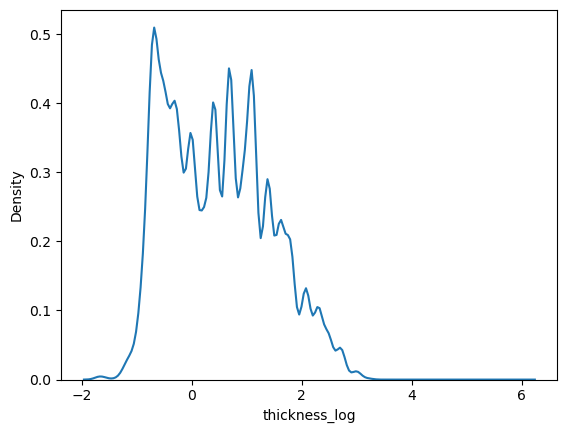

In [38]:
df['thickness_log'] = np.log(df['thickness'])
sns.kdeplot(df['thickness_log'])
plt.show()

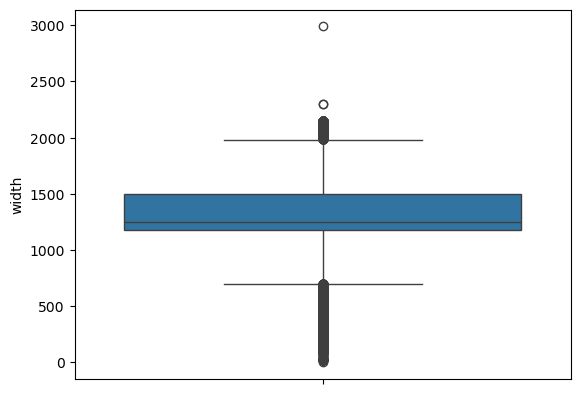

In [39]:
sns.boxplot(df['width'])
plt.show()

<Axes: >

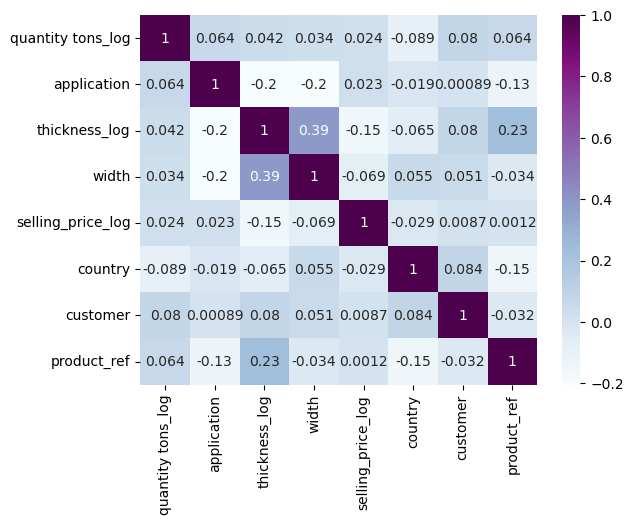

In [40]:
x=df[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()
sns.heatmap(x, annot=True, cmap="BuPu")

In [41]:
from sklearn.preprocessing import OrdinalEncoder
OE1 = OrdinalEncoder()
df['status'] = OE1.fit_transform(df[['status']])
OE2 = OrdinalEncoder()
df['item type'] = OE2.fit_transform(df[['item type']])

In [42]:
X=df[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df['selling_price_log']

In [43]:
from sklearn.preprocessing import StandardScaler
StdScaler = StandardScaler()
StdScaler.fit_transform(X)

array([[ 0.41506739,  0.70620108,  0.82144631, ..., -0.69225033,
        -0.75771563,  1.66790511],
       [ 2.25042993,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.29403459,  1.66498251],
       [ 1.77453529,  0.70620108,  1.76911846, ..., -0.61029817,
        -0.78103392, -0.65974878],
       ...,
       [ 1.34669579,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [-1.34846834,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [ 1.81043496,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654]])

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127134, 9)
(54486, 9)
(127134,)
(54486,)


In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.08464529083241956


In [47]:
y_pred_lr=lr.predict(X_test)

In [48]:
print(lr.score(X_test,y_test))

0.07805457024811924


In [49]:
print(metrics.r2_score(y_test,y_pred_lr))

0.07805457024811924


In [50]:
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4, random_state = 5)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

0.8737070361522715
0.886811832218784


In [51]:
gbr = GradientBoostingRegressor(n_estimators = 10, learning_rate = 0.1, random_state =5)
gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.7627437653996632
0.773871593198497


In [52]:
DecTreeReg = DecisionTreeRegressor()
# defining hyperparameters
grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=DecTreeReg, param_grid=grid, cv=5)
grid_search.fit(X_train, y_train)
print("hyperparameters:", grid_search.best_params_)

DecTreeReg_model = grid_search.best_estimator_
print('train score:',DecTreeReg_model.score(X_train,y_train))
y_pred = DecTreeReg_model.predict(X_test)

hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
train score: 0.9299589869280128


In [53]:

#mse
metrics.mean_squared_error(y_test,y_pred)

0.02637464412712937

In [54]:
metrics.mean_absolute_error(y_test, y_pred)

0.12557092499260764

In [55]:
print('Decision Tree Regressor')
print("Test score:",metrics.r2_score(y_test,y_pred))

Decision Tree Regressor
Test score: 0.9186127389709656


In [56]:
#pickle
import pickle
with open('choosen_model_decTreeReg.pkl','wb') as m:
    pickle.dump(DecTreeReg_model,m)
with open('std_scaler.pkl','wb') as std:
    pickle.dump(StdScaler,std)
with open('item.pkl','wb') as item_type:
    pickle.dump(OE2,item_type)
with open('status.pkl','wb') as stat:
    pickle.dump(OE1,stat)

Classifiction of status

In [57]:
dt=data[data['status'].isin(['Won', 'Lost'])]

In [58]:
dt.status.value_counts()

status
Won     115996
Lost     34431
Name: count, dtype: int64

In [59]:
OE1 = OrdinalEncoder()
dt['status'] = OE1.fit_transform(dt[['status']])
OE2 = OrdinalEncoder()
dt['item type'] = OE2.fit_transform(dt[['item type']])

In [60]:
dt['item type'].value_counts()

item type
5.0    91944
3.0    52456
2.0     5032
6.0      504
1.0      463
0.0       27
4.0        1
Name: count, dtype: int64

In [61]:
dt['status'].value_counts()

status
1.0    115996
0.0     34431
Name: count, dtype: int64

In [62]:
X = dt[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]
y = dt['status']

In [63]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)
counter = Counter(y)
print(counter)

Counter({1.0: 115996, 0.0: 115996})


In [64]:
from sklearn.preprocessing import StandardScaler
StdScaler_class = StandardScaler()
StdScaler_class.fit_transform(X)

array([[-0.09210226,  0.13735027,  0.92491332, ..., -0.66348594,
        -0.69957507,  1.57108175],
       [ 1.84969964,  0.88615711,  0.92491332, ..., -0.78858759,
        -0.29128982,  1.56823576],
       [ 0.81090509, -0.67613331,  1.88761925, ..., -0.58008484,
        -0.72010754, -0.69555674],
       ...,
       [-0.12779739, -1.19057273,  0.92491332, ..., -0.66348594,
        -0.69957507,  1.57108175],
       [-0.16231902, -0.28931718, -1.00049854, ..., -0.78858759,
        -0.70289354,  1.56823576],
       [-0.15319684, -0.47949712, -1.00049854, ..., -0.74688704,
         0.3061743 , -0.69554041]])

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(162394, 9)
(69598, 9)
(162394,)
(69598,)


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [67]:
decTreeCLass = DecisionTreeClassifier(max_depth = 12, random_state = 1)
decTreeCLass.fit(X_train, y_train)
train_score = decTreeCLass.score(X_train, y_train)
test_score = decTreeCLass.score(X_test, y_test)
print(train_score)
print(test_score)

0.8699582496890279
0.8632288284146096


In [68]:
KNClass = KNeighborsClassifier(n_neighbors = 6)
KNClass.fit(X_train, y_train)
print(KNClass.score(X_train, y_train))
print(KNClass.score(X_test, y_test))

0.9316661945638386
0.9085318543636312


In [69]:

GradientBoostClass = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.1,random_state = 5)
GradientBoostClass.fit(X_train, y_train)
print(GradientBoostClass.score(X_train, y_train))
print(GradientBoostClass.score(X_test, y_test))

0.7465731492542828
0.7465444409322107


In [70]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)
print(LogReg.score(X_train,y_train))
print(LogReg.score(X_test,y_test))

0.543646932768452
0.5421707520331044


In [71]:
randForestClass = RandomForestClassifier(n_estimators=20,max_depth=14,random_state=5)
randForestClass.fit(X_train,y_train)
print(randForestClass.score(X_train,y_train))
print(randForestClass.score(X_test,y_test))

0.9231313964801655
0.9082013850972729


In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="binary:logistic", random_state=40)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_train, y_train)

0.7353251171360651

In [73]:
y_predic = xgb_model.predict(X_test)
mean_squared_error(y_test,y_predic)

0.07045308567198735

In [77]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

1.0
0.9576280927612862


In [78]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9576280927612862
Confusion Matrix:
[[34111   900]
 [ 2049 32538]]


Confusion Matrix:
[[34111   900]
 [ 2049 32538]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96     35011
         1.0       0.97      0.94      0.96     34587

    accuracy                           0.96     69598
   macro avg       0.96      0.96      0.96     69598
weighted avg       0.96      0.96      0.96     69598



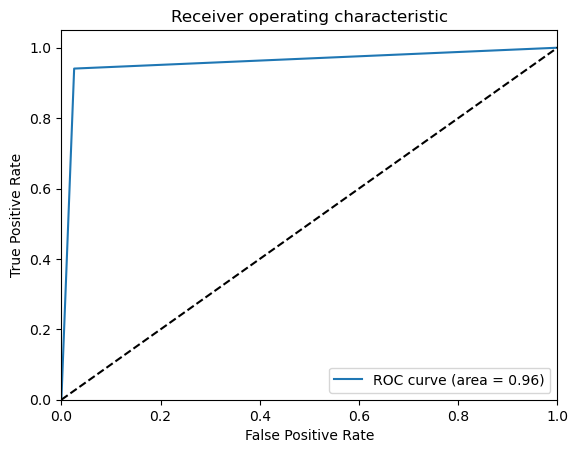

In [79]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [75]:
import pickle
with open('ExtraTreesClassifier_model.pkl', 'wb') as file:
    pickle.dump(clf, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(StdScaler_class, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(OE2, f)